In [1]:
# ! pip install pygam
# ! pip install shap
# ! pip freeze > requirements.txt

In [2]:
from preprocessing.data_preprocessor import DataPreprocessor

In [3]:
import numpy as np
import pandas as pd

data = pd.read_csv('datasets/marketing_campaign.csv', sep='	')
data = pd.read_csv('datasets/passanger_satisfaction.csv')
data = pd.read_csv('datasets/weatherAUS.csv')
data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [5]:
X, y = DataPreprocessor(data, 'RainTomorrow').preprocess()


---------------Preprocessing the dataset---------------
---------------Extracting Day, Month and Year--------------
---------------Deleting redundant features--------------
Feature: Date_hour has only one unique value. It will be removed.
Feature: Date_minute has only one unique value. It will be removed.
Feature: Date_second has only one unique value. It will be removed.
---------------Handling missing values------------------
The missing values in the feature "MinTemp" are filled with the median value.
The missing values in the feature "MaxTemp" are filled with the median value.
The missing values in the feature "Rainfall" are filled with the median value.
The missing values in the feature "Evaporation" are filled with the median value.
The missing values in the feature "Sunshine" are filled with the median value.
The missing values in the feature "WindGustDir" are filled with the most frequent value.
The missing values in the feature "WindGustSpeed" are filled with the median value.

In [9]:
X

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Cloud9am,Cloud3pm,Temp9am,Date_year,Date_month,Date_day,RainToday_No
0,0.041667,0.532808,0.517241,0.001617,0.033103,0.579310,0.866667,0.294574,0.866667,0.933333,...,0.71,0.22,0.449587,0.888889,0.555556,0.497845,0.1,1.000000,0.000000,1.0
1,0.041667,0.375328,0.559387,0.000000,0.033103,0.579310,0.933333,0.294574,0.400000,1.000000,...,0.44,0.25,0.497521,0.555556,0.555556,0.504310,0.1,1.000000,0.033333,1.0
2,0.041667,0.519685,0.570881,0.000000,0.033103,0.579310,1.000000,0.310078,0.866667,1.000000,...,0.38,0.30,0.447934,0.555556,0.222222,0.586207,0.1,1.000000,0.066667,1.0
3,0.041667,0.422572,0.614943,0.000000,0.033103,0.579310,0.266667,0.139535,0.600000,0.000000,...,0.45,0.16,0.613223,0.555556,0.555556,0.523707,0.1,1.000000,0.100000,1.0
4,0.041667,0.640420,0.697318,0.002695,0.033103,0.579310,0.866667,0.271318,0.066667,0.466667,...,0.82,0.33,0.500826,0.777778,0.888889,0.517241,0.1,1.000000,0.133333,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53505,0.479167,0.551181,0.475096,0.000000,0.033103,0.579310,0.733333,0.372093,0.933333,0.800000,...,0.42,0.68,0.613223,0.555556,0.555556,0.467672,0.6,0.000000,0.400000,1.0
97422,0.000000,0.425197,0.352490,0.021024,0.033103,0.351724,1.000000,0.240310,0.600000,1.000000,...,0.95,0.72,0.576860,0.555556,0.555556,0.359914,0.4,0.636364,0.200000,0.0
41735,0.937500,0.532808,0.611111,0.130458,0.078621,0.593103,1.000000,0.527132,0.400000,0.066667,...,0.80,0.64,0.466116,0.111111,0.555556,0.566810,0.8,0.272727,0.166667,0.0
134765,0.354167,0.538058,0.519157,0.000539,0.033103,0.579310,0.133333,0.325581,0.466667,0.466667,...,0.70,0.68,0.337190,0.555556,0.555556,0.530172,0.6,0.909091,0.900000,1.0


In [10]:
# XGBOOST

from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


model = XGBClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(np.array(y_test), y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

print(classification_report(y_test, y_pred))


Accuracy: 83.27%
              precision    recall  f1-score   support

           0       0.84      0.83      0.83     22829
           1       0.83      0.83      0.83     22595

    accuracy                           0.83     45424
   macro avg       0.83      0.83      0.83     45424
weighted avg       0.83      0.83      0.83     45424



In [11]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181696 entries, 5163 to 42987
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       181696 non-null  float64
 1   MinTemp        181696 non-null  float64
 2   MaxTemp        181696 non-null  float64
 3   Rainfall       181696 non-null  float64
 4   Evaporation    181696 non-null  float64
 5   Sunshine       181696 non-null  float64
 6   WindGustDir    181696 non-null  float64
 7   WindGustSpeed  181696 non-null  float64
 8   WindDir9am     181696 non-null  float64
 9   WindDir3pm     181696 non-null  float64
 10  WindSpeed9am   181696 non-null  float64
 11  WindSpeed3pm   181696 non-null  float64
 12  Humidity9am    181696 non-null  float64
 13  Humidity3pm    181696 non-null  float64
 14  Pressure9am    181696 non-null  float64
 15  Cloud9am       181696 non-null  float64
 16  Cloud3pm       181696 non-null  float64
 17  Temp9am        181696 non-n

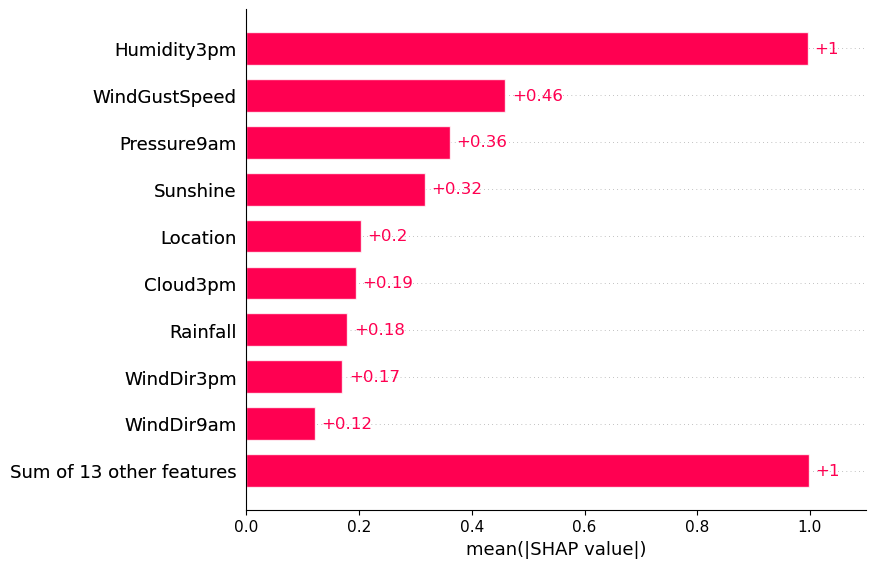

In [12]:
import shap

sampled_X_train = X_train.sample(1000)
explainer = shap.Explainer(model)

shap_values = explainer(sampled_X_train)

shap.plots.bar(shap_values)

In [14]:
# Random Forest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestClassifier()  
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(np.array(y_test), y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

print(classification_report(y_test, y_pred))


Accuracy: 95.08%
              precision    recall  f1-score   support

           0       0.98      0.92      0.95     22770
           1       0.93      0.98      0.95     22654

    accuracy                           0.95     45424
   macro avg       0.95      0.95      0.95     45424
weighted avg       0.95      0.95      0.95     45424

